In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data=df.copy()
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
df.region.value_counts().unique()

array([364, 325, 324], dtype=int64)

Text(0, 0.5, 'Expense')

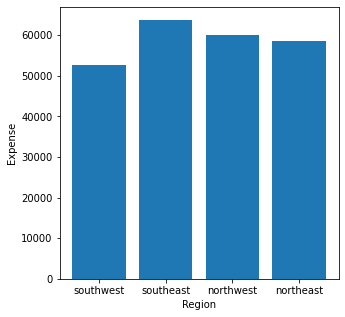

In [8]:
plt.figure(figsize=(5,5))
plt.bar(df['region'],df['expenses'])
plt.xlabel('Region')
plt.ylabel('Expense')

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


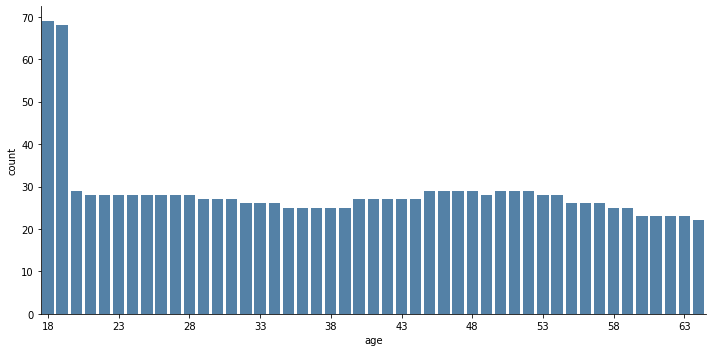

In [9]:
g = sns.factorplot("age", data=data, aspect=2,
                       kind="count", color='steelblue')
g.set_xticklabels(step=5)

<AxesSubplot:>

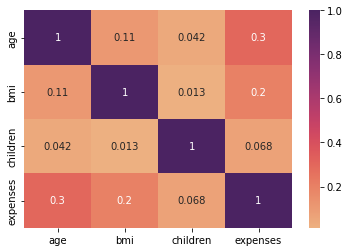

In [10]:
sns.heatmap(df.corr(),cmap='flare',annot=True)

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [12]:
le1 = LabelEncoder()
df["sex"] = le1.fit_transform(df.sex)

In [13]:
le2 = LabelEncoder()
df["smoker"] = le1.fit_transform(df.smoker)

In [14]:
le3 = LabelEncoder()
df["region"] = le1.fit_transform(df.smr)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [16]:
x=df.drop('expenses',axis=1)
y=df['expenses']

In [17]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [18]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor

In [21]:
lr=LinearRegression()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
xgb=XGBRFRegressor()

In [22]:
list=[]

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred1=lr.predict(x_test)

In [25]:
list.append({'Model':'Linear Regression', 'MSE':mean_squared_error(y_pred1,y_test), 'R2 score':r2_score(y_pred1,y_test)*100})

In [26]:
MSE=mean_squared_error(y_pred1,y_test)
R2_SCORE=r2_score(y_pred1,y_test)

In [27]:
MSE

35173346.61597335

In [28]:
R2_SCORE

0.6844381264925272

In [29]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
y_pred2=rf.predict(x_test)

In [31]:
list.append({'Model':'Random Forest Regression', 'MSE':mean_squared_error(y_pred2,y_test), 'R2 score':r2_score(y_pred2,y_test)*100})

In [32]:
MSE=mean_squared_error(y_pred2,y_test)
R2_SCORE=r2_score(y_pred2,y_test)

In [33]:
print(MSE, R2_SCORE)

22660631.879107453 0.8443590683324241


In [34]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred3=dt.predict(x_test)

In [36]:
list.append({'Model':'Decison Tree Regression', 'MSE':mean_squared_error(y_pred3,y_test), 'R2 score':r2_score(y_pred3,y_test)*100})

In [37]:
MSE=mean_squared_error(y_pred3,y_test)
R2_SCORE=r2_score(y_pred3,y_test)

In [38]:
R2_SCORE

0.7400757260264734

In [39]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [40]:
y_pred4=xgb.predict(x_test)

In [41]:
list.append({'Model':'XGB Regression', 'MSE':mean_squared_error(y_pred4,y_test), 'R2 score':r2_score(y_pred4,y_test)*100})

In [42]:
MSE=mean_squared_error(y_pred4,y_test)
R2_SCORE=r2_score(y_pred4,y_test)

In [43]:
R2_SCORE

0.8476994017106922

In [44]:
Score = pd.DataFrame(list,columns=['Model','MSE','R2 score'])
Score.sort_values('R2 score',ascending=False,inplace=True)
Score

,Model,MSE,R2 score
3,XGB Regression,2.083596e+07,84.769940
1,Random Forest Regression,2.266063e+07,84.435907
2,Decison Tree Regression,4.340429e+07,74.007573
0,Linear Regression,3.517335e+07,68.443813


In [109]:
import pickle

In [110]:
filename='final_model.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [111]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict([[34,1,44,1,1,3]])

ValueError: training data did not have the following fields: age, sex, bmi, children, smoker, region

In [112]:
x_train

,age,sex,bmi,children,smoker,region
693,24,1,23.7,0,0,1
1297,28,0,26.5,2,0,2
634,51,1,39.7,1,0,3
1022,47,1,36.1,1,1,2
178,46,0,28.9,2,0,3
...,...,...,...,...,...,...
1095,18,0,31.4,4,0,0
1130,39,0,23.9,5,0,2
1294,58,1,25.2,0,0,0
860,37,0,47.6,2,1,3
